# Unsupervised Learning

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For importing example data
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [3]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

Let's imagine a simple case such as using housing square footage to predict prices.

Ues Padres database.

In [4]:
# Use Padres data from 2018
sql_query = """
SELECT * FROM batting_stats18_wpid
WHERE "Team"='Padres';
"""
df_padres = pd.read_sql_query(sql_query,con)
df_padres.head()

index  index_x  Season            Name    Team   Age      G     AB     PA  \
0    123     1094  2018.0   Austin Hedges  Padres  25.0   91.0  303.0  326.0   
1    164      553  2018.0  Hunter Renfroe  Padres  26.0  117.0  403.0  441.0   
2    166      692  2018.0       Wil Myers  Padres  27.0   83.0  312.0  343.0   
3    409     1507  2018.0      Luis Urias  Padres  21.0   12.0   48.0   53.0   
4    192      331  2018.0   Franmil Reyes  Padres  22.0   87.0  261.0  285.0   

       H  ...  first_name  index_y  name_last  name_first  key_mlbam  \
0   70.0  ...      austin      784     hedges      austin     595978   
1  100.0  ...      hunter     1444    renfroe      hunter     592669   
2   79.0  ...         wil     1233      myers         wil     571976   
3   10.0  ...        luis     1809      urias        luis     649966   
4   73.0  ...     franmil     1448      reyes     franmil     614177   

   key_retro  key_bbref  key_fangraphs  mlb_played_first  mlb_played_last  
0   hedga001  hedgeau01          12976            2015.0           2019.0  
1   renfh001  renfrhu01          15464            2016.0           2019.0  
2   myerw001  myerswi01          10047            2013.0           2019.0  
3   urial001  uriaslu01          16622            2018.0           2019.0  
4   reyef001  reyesfr01          14566            2018.0           2019.0  

[5 rows x 300 columns]

In [22]:
[print(i) for i in df_padres.columns]

index
index_x
Season
Name
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB_perc
K_perc
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD_perc
GB_perc
FB_perc
IFFB_perc
HR/FB
IFH_perc
BUH_perc
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB_perc _Pitch
FBv
SL_perc
SLv
CT_perc
CTv
CB_perc
CBv
CH_perc
CHv
SF_perc
SFv
KN_perc
KNv
XX_perc
PO_perc
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing_perc
Z-Swing_perc
Swing_perc
O-Contact_perc
Z-Contact_perc
Contact_perc
Zone_perc
F-Strike_perc
SwStr_perc
BsR
FA_perc _pfx
FT_perc _pfx
FC_perc _pfx
FS_perc _pfx
FO_perc _pfx
SI_perc _pfx
SL_perc _pfx
CU_perc _pfx
KC_perc _pfx
EP_perc _pfx
CH_perc _pfx
SC_perc _pfx
KN_perc _pfx
UN_perc _pfx
vFA _pfx
vFT _pfx
vFC _pfx
vFS _pfx
vFO _pfx
vSI _pfx
vSL _pfx
vCU _pfx
vKC _pfx
vEP _pfx
vCH _pfx
vSC _pfx
vKN _pfx
FA-X _pfx
FT-X _pfx
FC-X _pfx
FS-X _pfx
FO-X _pfx
SI-X 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

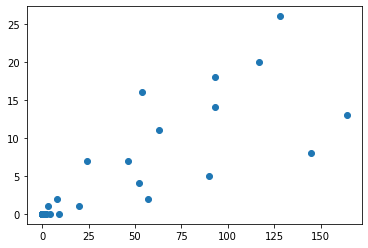

In [24]:
plt.scatter(df_padres['FB'], df_padres['HR'])

# K means vs. heirarchical clustering

See this video
https://www.youtube.com/watch?v=QXOkPvFM6NU&t=933s

See this site
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

# PCA

Amazing explanation
<br>
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
    
<br>
Good video on covariance matrix
<br>

https://www.youtube.com/watch?v=152tSYtiQbw


# [bottom of notebook]